In [1]:
import sys
import warnings
import itertools
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import statsmodels.tools.eval_measures as      em
%matplotlib inline
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams

In [2]:
df1 = pd.read_csv('dataset_group.csv' , parse_dates=True,index_col='YearMonth')

In [3]:
df1.head()

,All sale
YearMonth,
2018-01-01,39
2018-02-01,80
2018-03-01,22
2018-04-01,13
2018-05-01,60


In [4]:
dates = pd.date_range(start='2018-01-01', freq='MS', periods=len(df1))

In [5]:
import calendar
df1['Month'] = dates.month
df1['Month'] = df1['Month'].apply(lambda x: calendar.month_abbr[x]) #spltting into english month names 
df1['Year'] = dates.year

In [6]:
df1.drop(['YearMonth'], axis=1, inplace=True)

KeyError: "['YearMonth'] not found in axis"

In [7]:
df1 = df1[['Month', 'Year', 'All sale']

SyntaxError: unexpected EOF while parsing (1907556027.py, line 1)

In [8]:
df1.set_index(dates, inplace=True)

In [9]:
df1.head(5)

,All sale,Month,Year
2018-01-01,39,Jan,2018
2018-02-01,80,Feb,2018
2018-03-01,22,Mar,2018
2018-04-01,13,Apr,2018
2018-05-01,60,May,2018


In [11]:
monthly_sales_data = pd.pivot_table(df1, values = "All sale", columns = "Year", index = "Month")
monthly_sales_data

Year,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,...,2059,2060,2061,2062,2063,2064,2065,2066,2067,2068
Month,,,,,,,,,,,,,,,,,,,,,
Apr,13.0,32.0,21.0,38.0,8.0,46.0,24.0,27.0,12.0,48.0,...,27.0,14.0,48.0,50.0,15.0,15.0,51.0,9.0,35.0,NaN
Aug,31.0,45.0,15.0,20.0,14.0,55.0,12.0,10.0,36.0,27.0,...,26.0,15.0,23.0,27.0,38.0,30.0,32.0,16.0,29.0,NaN
Dec,29.0,23.0,20.0,30.0,127.0,24.0,17.0,54.0,36.0,28.0,...,77.0,19.0,52.0,14.0,52.0,47.0,31.0,19.0,20.0,NaN
Feb,80.0,5.0,23.0,37.0,61.0,43.0,11.0,11.0,29.0,23.0,...,43.0,36.0,8.0,28.0,91.0,8.0,6.0,25.0,30.0,19.0
Jan,39.0,60.0,18.0,33.0,22.0,45.0,49.0,23.0,81.0,21.0,...,32.0,49.0,44.0,23.0,55.0,12.0,24.0,29.0,33.0,23.0
Jul,52.0,43.0,31.0,10.0,21.0,6.0,12.0,28.0,52.0,28.0,...,11.0,10.0,42.0,22.0,36.0,81.0,96.0,9.0,19.0,NaN
Jun,19.0,84.0,86.0,37.0,48.0,31.0,53.0,18.0,19.0,27.0,...,109.0,26.0,56.0,12.0,54.0,27.0,7.0,7.0,39.0,NaN
Mar,22.0,59.0,22.0,10.0,8.0,30.0,18.0,5.0,16.0,74.0,...,16.0,57.0,5.0,28.0,18.0,45.0,15.0,23.0,13.0,3.0
May,60.0,59.0,20.0,11.0,99.0,134.0,5.0,61.0,12.0,29.0,...,24.0,17.0,4.0,6.0,53.0,87.0,91.0,33.0,31.0,NaN


<Figure size 1500x2500 with 0 Axes>

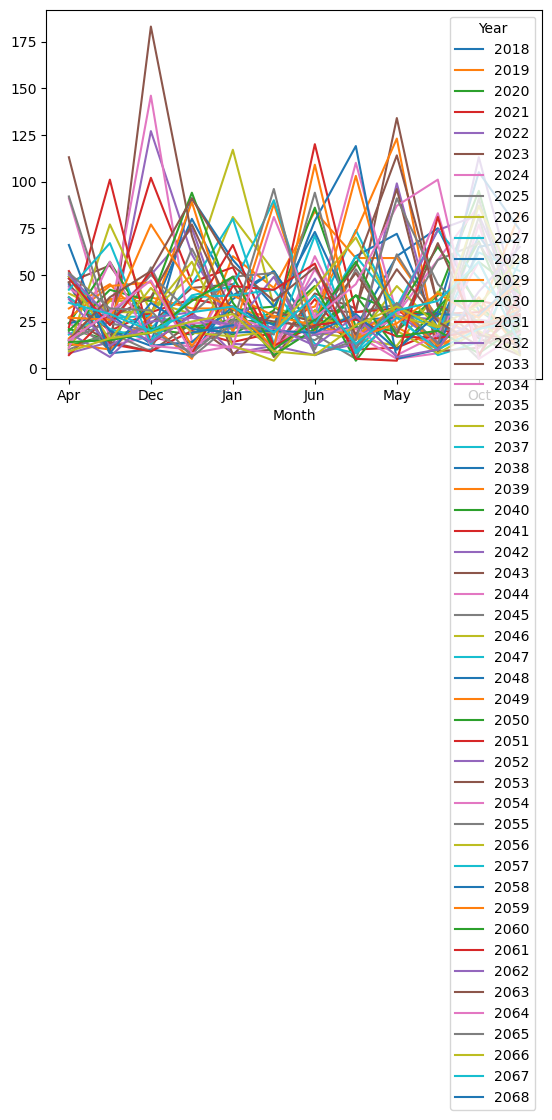

In [17]:
plt.figure(figsize=(15,25))
monthly_sales_data.plot();

In [18]:
yearly_sales_data = pd.pivot_table(df1, values = "All sale", columns = "Month", index = "Year")
yearly_sales_data = yearly_sales_data[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
yearly_sales_data

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2018,39.0,80.0,22.0,13.0,60.0,19.0,52.0,31.0,16.0,31.0,75.0,29.0
2019,60.0,5.0,59.0,32.0,59.0,84.0,43.0,45.0,28.0,17.0,27.0,23.0
2020,18.0,23.0,22.0,21.0,20.0,86.0,31.0,15.0,18.0,95.0,39.0,20.0
2021,33.0,37.0,10.0,38.0,11.0,37.0,10.0,20.0,14.0,19.0,20.0,30.0
2022,22.0,61.0,8.0,8.0,99.0,48.0,21.0,14.0,31.0,113.0,16.0,127.0
2023,45.0,43.0,30.0,46.0,134.0,31.0,6.0,55.0,7.0,16.0,33.0,24.0
2024,49.0,11.0,18.0,24.0,5.0,53.0,12.0,12.0,9.0,77.0,8.0,17.0
2025,23.0,11.0,5.0,27.0,61.0,18.0,28.0,10.0,69.0,5.0,26.0,54.0
2026,81.0,29.0,16.0,12.0,12.0,19.0,52.0,36.0,23.0,30.0,41.0,36.0


<AxesSubplot:xlabel='Year'>

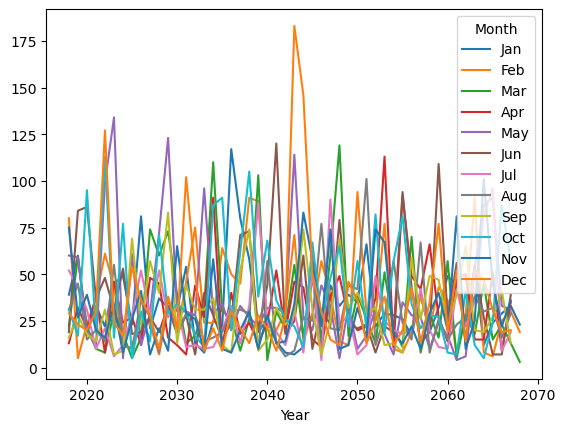

In [19]:
yearly_sales_data.plot()

<AxesSubplot:>

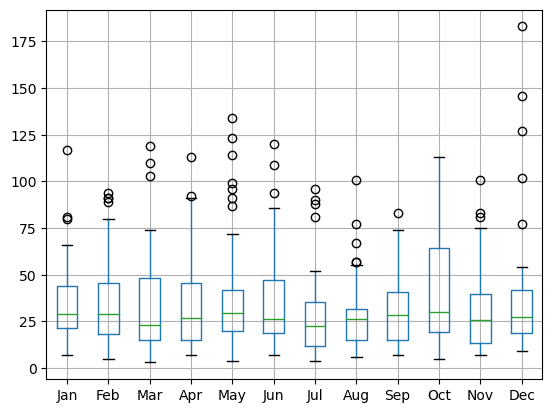

In [20]:
yearly_sales_data.boxplot()

In [21]:
sales_ts = df1['All sale']

In [22]:
decomposition = sm.tsa.seasonal_decompose(sales_ts, model='multiplicative')

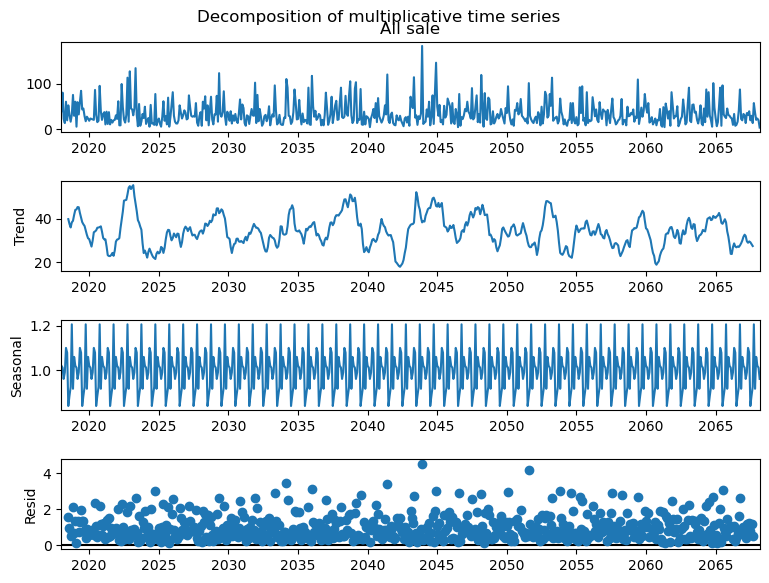

In [23]:
fig = decomposition.plot()
fig.set_figwidth(8)
fig.set_figheight(6)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

Text(0, 0.5, 'All sale')

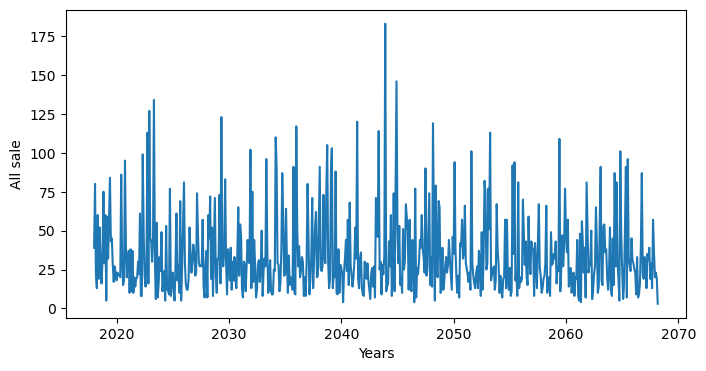

In [27]:
plt.figure(figsize=(8, 4))
plt.plot(sales_ts)
plt.xlabel('Years')
plt.ylabel('All sale')